### Задание
Считать цветное изображение и выполнить вывод:
1. Проквантовать изображение, сократив число градаций до 8, 4, 2
2. Продискретизировать изображение с шагом дискретизации  10, 20, 30 

In [4]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

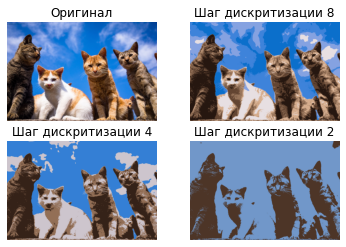

In [30]:
img = cv2.imread('cat.jpg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

Z = img.reshape((-1, 3))
Z = np.float32(Z) 

crt = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

k = 8

pose = 221
plt.subplot(pose)
plt.axis('off')
plt.title("Оригинал")
plt.imshow(img)

while k >= 2:
    ret, label, center = cv2.kmeans(Z, k, None, crt, 10, cv2.KMEANS_RANDOM_CENTERS)

    center = np.uint8(center)
    res = center[label.flatten()]
    res2 = res.reshape((img.shape))
    
    pose +=1
    plt.subplot(pose)
    plt.axis('off')
    plt.title(f"Шаг дискритизации {k}")
    plt.imshow(res2)
    k = k//2

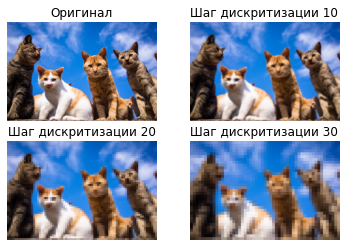

In [13]:
image = cv2.imread('cat.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
img = image.copy()

K = 10# размер шага
pose = 221
plt.subplot(pose)
plt.axis('off')
plt.title("Оригинал")
plt.imshow(image)
while K <= 30:
    s = img.shape
    h1, w1 = s[0], s[1]
    h = (s[0] - s[0] % K)
    w = (s[1] - s[1] % K)

    img = cv2.resize(img, (w, h))

    for y in range(0, h-1, K):
        for x in range(0, w-1, K):
            if len(s) > 2:
                s = np.average(img[y:(y + K), x:(x + K)], axis=0)
                img[y:(y + K), x:(x + K)] = np.average(s, axis=0)
            else:
                s = img[y:(y+K), x:(x+K)]
                img[y:(y+K), x:(x+K)] = np.average(s)
                
    img = cv2.resize(img, (w1, h1))
    pose +=1
    plt.subplot(pose)
    plt.axis('off')
    plt.title(f"Шаг дискритизации {K}")
    plt.imshow(img)
    K += 10